In [102]:
import numpy as np
from matplotlib import pyplot as plt

In [103]:
a=0.4
mu=-3
sigma=1.8
De=0.9
Dnu=0.3
N=100

In [104]:
gamma = np.random.normal(mu, sigma, 1)
h_n = [gamma[0]]
eps = np.random.normal(0, De**0.5, N)
nu = np.random.normal(0, Dnu**0.5, N)
eta_n = [h_n[-1] + nu[0]]
for i in range(1, N):
    h_n.append(h_n[-1] * a + eps[i])
    eta_n.append(h_n[-1] + nu[i])

xi =  [mu]
P = [sigma**2]

for i in range(1, N):
    xi_a = xi[-1] * a
    xi.append(xi_a + (a**2 * P[-1] + De)*(a**2 * P[-1] + De + Dnu)**(-1) *(eta_n[i] - xi_a))
    P.append(a**2 * P[-1] + De - (a**2* P[-1] * De)**2 *(a**2 * P[-1] + De + Dnu)**(-1))

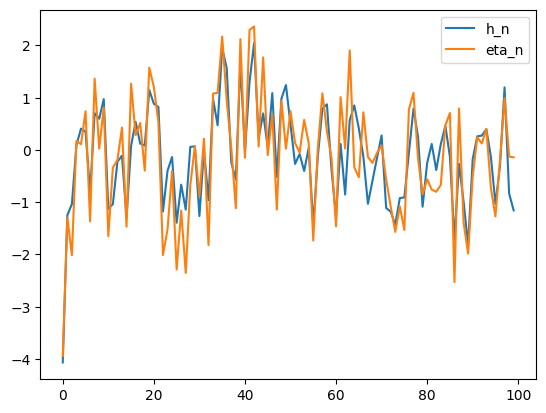

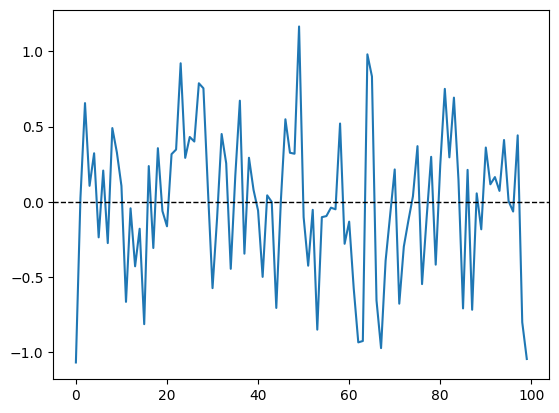

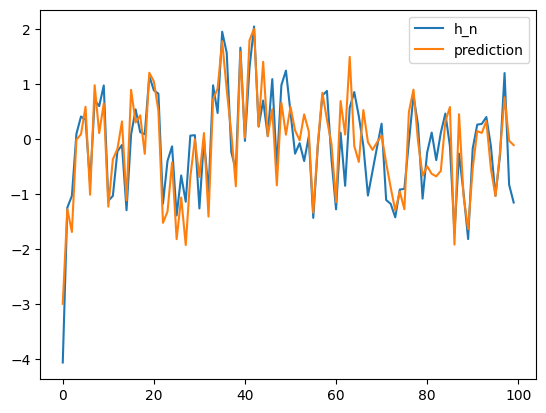

In [105]:
plt.plot(h_n, label="h_n")
plt.plot(eta_n, label="eta_n")
plt.legend()
plt.show()

diff = [h_n[i] - xi[i] for i in range(N)]
plt.plot(diff)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

plt.plot(h_n, label="h_n")
plt.plot(xi, label="prediction")
plt.legend()
plt.show()

In [106]:
MSE = 1/(N + 1) * sum([(xi[i] - h_n[i])**2 for i in range(N)])
D_hat_nu = 1/(N + 1) * sum([nu[i]**2 for i in range(N)])
print(MSE, D_hat_nu) # < D_nu

0.2289697008987462 0.3433540404856229


with

### Rademacher noise

0.22041525554078165 0.2970297029702975


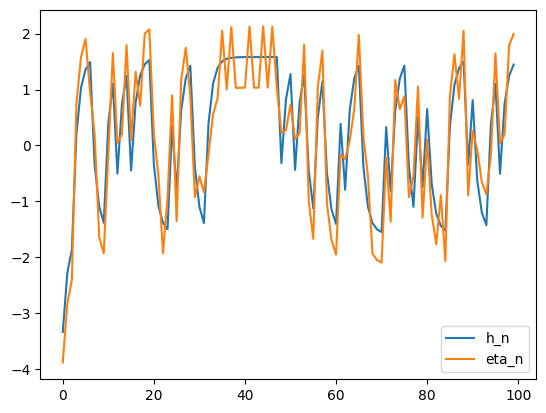

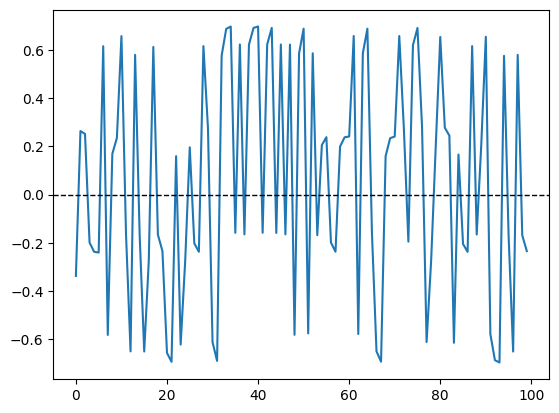

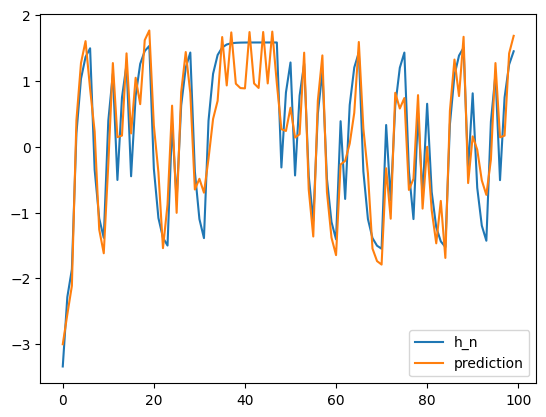

In [107]:
gamma = np.random.normal(mu, sigma, 1)
h_n = [gamma[0]]
eps = np.random.choice([-De**0.5, De**0.5], N)
nu = np.random.choice([-Dnu**0.5, Dnu**0.5], N)
eta_n = [h_n[-1] + nu[0]]
for i in range(1, N):
    h_n.append(h_n[-1] * a + eps[i])
    eta_n.append(h_n[-1] + nu[i])

xi =  [mu]
P = [sigma**2]

for i in range(1, N):
    xi_a = xi[-1] * a
    xi.append(xi_a + (a**2 * P[-1] + De)*(a**2 * P[-1] + De + Dnu)**(-1) *(eta_n[i] - xi_a))
    P.append(a**2 * P[-1] + De - (a**2* P[-1] * De)**2 *(a**2 * P[-1] + De + Dnu)**(-1))

MSE = 1/(N + 1) * sum([(xi[i] - h_n[i])**2 for i in range(N)])
D_hat_nu = 1/(N + 1) * sum([nu[i]**2 for i in range(N)])
print(MSE, D_hat_nu) # < D_nu

plt.plot(h_n, label="h_n")
plt.plot(eta_n, label="eta_n")
plt.legend()
plt.show()

diff = [h_n[i] - xi[i] for i in range(N)]
plt.plot(diff)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.show()

plt.plot(h_n, label="h_n")
plt.plot(xi, label="prediction")
plt.legend()
plt.show()